[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

tickers: ['AMZN', 'MSFT', 'AAPL', 'GOOG', 'META', 'ORCL', 'NFLX', 'ADBE', 'TWLO', 'AVGO', 'CRM', 'JNJ', 'LLY', 'PFE', 'UNH', 'V', 'MA', 'BRK-B', 'JPM', 'COST', 'PG']
time window = warmup-date: 2021-04-14, start-date: 2021-08-12, end-data: 2022-08-12



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

2021-08-12, AMZN, close:  165.18,  rsi: 34.30, rsi-ma: 47.26, position: 0.00, pnl-pct: 0.00%
2021-08-12, MSFT, close:  289.81,  rsi: 65.83, rsi-ma: 66.40, position: 0.00, pnl-pct: 0.00%
2021-08-12, AAPL, close:  148.89, *rsi: 63.81, rsi-ma: 61.57, position: 0.00, pnl-pct: 0.00%
2021-08-12, GOOG, close:  138.39, *rsi: 67.27, rsi-ma: 66.10, position: 0.00, pnl-pct: 0.00%
2021-08-12, META, close:  362.65,  rsi: 57.08, rsi-ma: 57.45, position: 0.00, pnl-pct: 0.00%
2021-08-12, ORCL, close:   89.81,  rsi: 62.34, rsi-ma: 61.18, position: 0.00, pnl-pct: 0.00%
2021-08-12, NFLX, close:  510.72,  rsi: 42.32, rsi-ma: 49.41, position: 0.00, pnl-pct: 0.00%
2021-08-12, ADBE, close:  634.35,  rsi: 69.20, rsi-ma: 70.49, position: 0.00, pnl-pct: 0.00%
2021-08-12, TWLO, close:  368.29,  rsi: 45.91, rsi-ma: 51.54, position: 0.00, pnl-pct: 0.00%
2021-08-12, AVGO, close:   48.43, *rsi: 55.41, rsi-ma: 55.27, position: 0.00, pnl-pct: 0.00%
2021-08-12, CRM, close:  248.39, *rsi: 56.46, rsi-ma: 54.28, position:

<IPython.core.display.Javascript object>

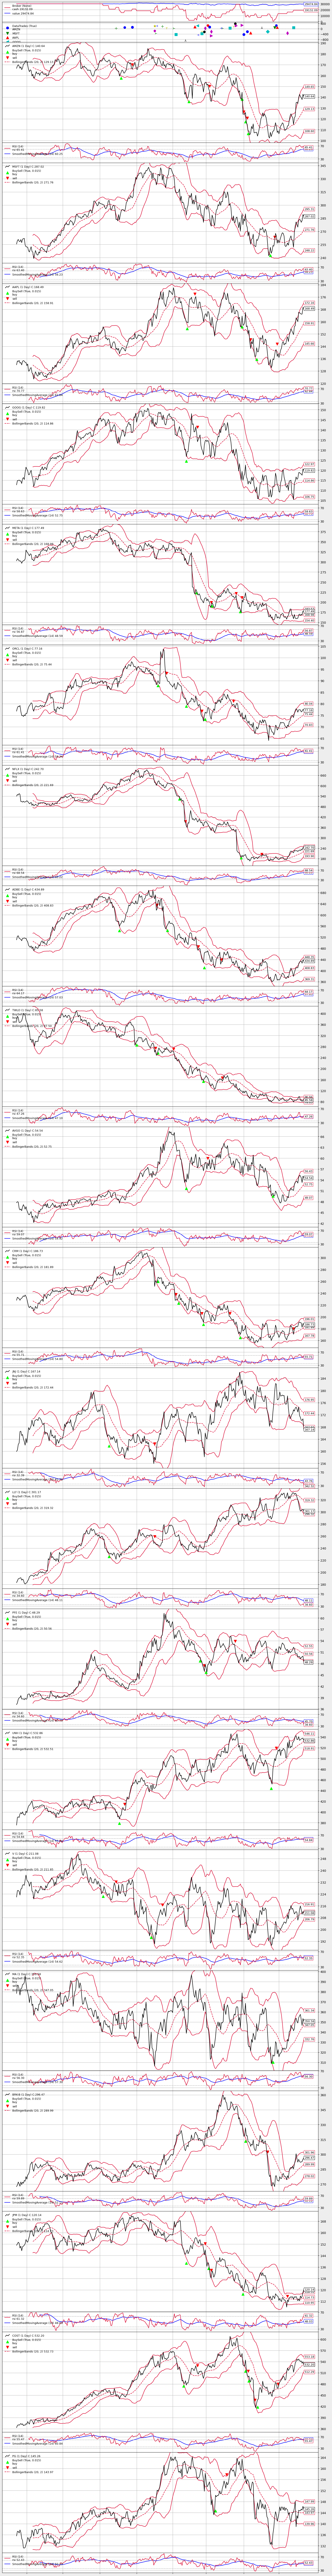

In [6]:
import conf

from services.backtesting_service import RsiBollingerStrategy
from optimise_common import *

import datetime  # For datetime objects
import backtrader as bt
import backtrader.analyzers as btanalyzers
import yfinance as yf

optimise = False
initial_cash = 30000

# strategy-controls
printlog=True
upper_rsi=60
lower_rsi=35
loss_pct_threshold = 8
profit_protection_pct_threshold = 0
fixed_investment_amount=3000
# backtest window 
num_years = 1
year_offset = 0

# stock to test
#tickers = non_tech_stock
tickers = interesting_stock
#tickers = ['NFLX', 'JPM', 'AMZN', 'BRK-B', 'UNH', 'PFE']

warmup_date, start_date, end_date = optimisation_dates(num_years, year_offset)

def add_stats(rsi_lower, rsi_upper, loss_pct, profit_protection_pct_threshold, fixed_investment_amount, final_value):
    stats.append({'rsi_lower': rsi_lower, 
                  'rsi_upper': rsi_upper, 
                  'loss_pct': loss_pct,
                  'profit_protection_pct_threshold': profit_protection_pct_threshold,
                  'fixed_investment_amount': fixed_investment_amount ,
                  'final_value': final_value}) 

def strategy_completed_callback(strategy):
    final_value = strategy.broker.get_value()
    print("strategy_completed_callback stats: " + 
        f'lower_rsi: {strategy.params.lower_rsi}, ' +
        f'upper_rsi: {strategy.params.upper_rsi}, ' +
        f'loss_pct: {strategy.params.loss_pct_threshold}, ' +
        f'profit_protection_pct_threshold: {strategy.params.profit_protection_pct_threshold}, ' +
        f'fixed_investment_amount: {strategy.params.fixed_investment_amount}, ' +
        f'final Portfolio Value: {final_value:.0f}'
    )
    stats.append({'rsi_lower': strategy.params.lower_rsi, 
        'rsi_upper': strategy.params.upper_rsi, 
        'loss_pct': strategy.params.loss_pct_threshold,
        'profit_protection_pct_threshold': strategy.params.profit_protection_pct_threshold,
        'fixed_investment_amount': strategy.params.fixed_investment_amount,
        'final_value': round(strategy.broker.getvalue())}) 

stats = []

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = create_cerebro()

    if not optimise:
        # Add a strategy (see strategy-controls)
        cerebro.addstrategy(RsiBollingerStrategy,
                            start_date = start_date,
                            printlog = printlog,
                            upper_rsi = upper_rsi,
                            lower_rsi = lower_rsi,
                            loss_pct_threshold = loss_pct_threshold,
                            profit_protection_pct_threshold = profit_protection_pct_threshold,
                            fixed_investment_amount = fixed_investment_amount)
    else:
        strats = cerebro.optstrategy(
            RsiBollingerStrategy,
            start_date = start_date,
            upper_rsi= 60 , # upper_rsi=range(55, 70, 5), RSI-upper down-crossing not wired
            lower_rsi = range(30, 60, 5), #, 40 
            loss_pct_threshold = 8, # range(1,15),
            profit_protection_pct_threshold = 0, #range(0, 100, 25),
            fixed_investment_amount = 5000, # range(500, 5500, 500),
            custom_callback=strategy_completed_callback,
            )
        cerebro.addanalyzer(btanalyzers.DrawDown, _name='drawdown')

    add_data_feed(cerebro, tickers, warmup_date, start_date, end_date)
    set_cash(cerebro, initial_cash)
    
    execute_cerebro(cerebro, optimise, stats)

    
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams #Creates parameters for our plot
if not optimise:
    print(f'Plotting graphs ...')
    # Plot the result
    rcParams['figure.figsize'] = 16, 6 * len(tickers) #size
    rcParams['figure.facecolor'] = '#eeeeee' #Color scheme
    plt.plot() #The Plot Code
    plt.close()
    cerebro.plot(iplot=True, volume=False)
 